In [50]:
words = open('names.txt','r').read().splitlines()

In [51]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [52]:
len(words)

32033

In [53]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigtam = (ch1,ch2)
        b[bigtam] = b.get(bigtam,0)+1

In [54]:
sorted(b.items(),key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [55]:
import torch

In [56]:
N = torch.zeros((27,27),dtype=torch.int32)

In [57]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

In [58]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

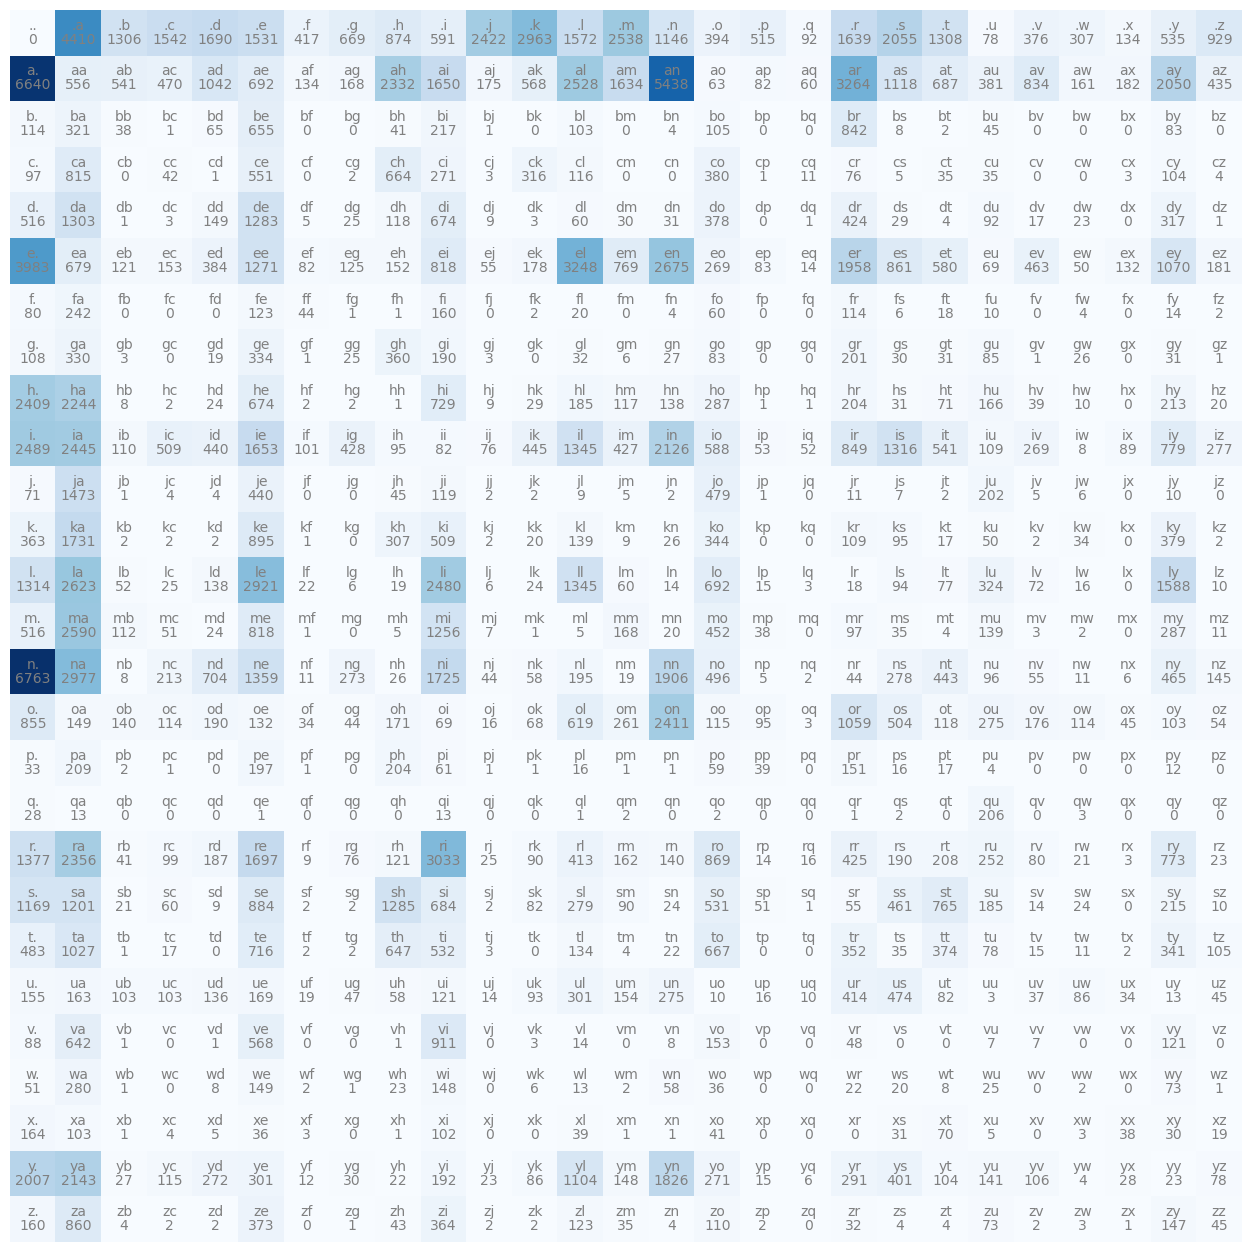

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color='gray')
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color='gray')
plt.axis('off')
plt.show()

In [63]:
p = N[0].to(float)
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290],
       dtype=torch.float64)

In [64]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

's'

In [ ]:
P = (N+1).float() # to make the model smooth
P /= P.sum(dim = 1,keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [75]:
ix = 0
out = []
for i in range(10):
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
print(''.join(out))

yaenon.ka.jabdinerimikimaynin.anaasn.ssorionsush.dgossmitan.il.le.pann.that.


In [80]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


我们换一种方法，前面这种叫“双词法”，下面将使用神经网络方法，最终达到相似的效果。

In [96]:
# create the training set of bigrams (x,y)
xs,ys= [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

我们不能直接输入整数给神经网络，因此引入one-hot，one-hot处理一个整数x，在索引为x的地方为1，其余地方均为0的行向量。

In [ ]:
import torch.nn.functional as F

In [ ]:
# randomly initialize 27 neurons' weights.each neuron recieves 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g)

tensor([[ 1.1708,  0.4447,  1.1185,  0.6904,  0.1531,  0.3992,  2.1276,  5.3285,
          0.5861,  0.3323,  1.6582,  0.9277,  1.4980,  0.2647,  0.2043,  0.6171,
          0.5400,  0.3591,  0.6723,  0.8755,  1.1595,  0.6410,  0.4042,  0.8634,
         15.4149,  0.8149,  1.5394],
        [ 2.6877,  0.0485,  1.3932,  0.4358,  1.8648,  0.2836,  2.2818,  2.0137,
          2.1464,  3.5110,  2.4336,  2.1120,  2.4466,  0.8566,  0.5519,  4.8650,
          2.0937,  1.4256,  0.4556,  2.4205,  0.2481,  1.6265,  0.2947,  1.9077,
          0.4006,  0.7296,  0.6098],
        [ 0.2012,  2.0163,  2.1226,  1.3046,  0.4108,  0.3542,  2.7657,  0.3651,
          6.8689,  2.5250,  0.1292,  0.3571,  0.2328,  0.3693,  3.7375,  1.1819,
          0.4823,  0.2284,  1.6948,  2.1976,  0.2406,  0.7788,  0.1946,  2.9403,
          1.0015,  1.5364,  0.1931],
        [ 0.2012,  2.0163,  2.1226,  1.3046,  0.4108,  0.3542,  2.7657,  0.3651,
          6.8689,  2.5250,  0.1292,  0.3571,  0.2328,  0.3693,  3.7375,  1.1819

In [109]:
xenc = F.one_hot(xs,num_classes=27).float() #input to the network:one-hot encoding
logits = xenc @ W #log-counts
counts = logits.exp() # counts equivalent to N   Softmax function
probs = counts / counts.sum(1,keepdim=True)

In [110]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f'bigram expample {i+1}: {itos[x]} {itos[y]} (indexed {x},{y})')
    print('input to the neural net:',x)
    print('output probabilities from the neural net',probs[i])
    print('label (actual next character):' ,y)
    p = probs[i,y]
    print('probability assigned by the net to the correct character:',p.item())
    logp = torch.log(p)
    print('log likelihood:',logp.item())
    nll = -logp
    print('negative log likelihood:',nll.item())
    nlls[i] = nll
print('---------')
print('average negative log likelihood,i.e. loss=',nlls.mean().item())

--------
bigram expample 1: . e (indexed 0,5)
input to the neural net: 0
output probabilities from the neural net tensor([0.0287, 0.0109, 0.0274, 0.0169, 0.0038, 0.0098, 0.0521, 0.1306, 0.0144,
        0.0081, 0.0406, 0.0227, 0.0367, 0.0065, 0.0050, 0.0151, 0.0132, 0.0088,
        0.0165, 0.0215, 0.0284, 0.0157, 0.0099, 0.0212, 0.3778, 0.0200, 0.0377])
label (actual next character): 5
probability assigned by the net to the correct character: 0.009784234687685966
log likelihood: -4.626982688903809
negative log likelihood: 4.626982688903809
--------
bigram expample 2: e m (indexed 5,13)
input to the neural net: 5
output probabilities from the neural net tensor([0.0638, 0.0012, 0.0331, 0.0103, 0.0442, 0.0067, 0.0541, 0.0478, 0.0509,
        0.0833, 0.0577, 0.0501, 0.0581, 0.0203, 0.0131, 0.1154, 0.0497, 0.0338,
        0.0108, 0.0574, 0.0059, 0.0386, 0.0070, 0.0453, 0.0095, 0.0173, 0.0145])
label (actual next character): 13
probability assigned by the net to the correct character: 0.02032

In [112]:
# ------OPTIMIZATION!------

In [113]:
xs

tensor([ 0,  5, 13, 13,  1])

In [114]:
ys

tensor([ 5, 13, 13,  1,  0])

In [122]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g,requires_grad=True)

In [ ]:
#forward pass
xenc = F.one_hot(xs,num_classes=27).float() #input to the network:one-hot encoding
logits = xenc @ W #log-counts
counts = logits.exp() # counts equivalent to N   Softmax function
probs = counts / counts.sum(1,keepdim=True)
loss = -probs[torch.arange(5),ys].log().mean() + 0.01 * (W**2).mean()

In [135]:
print(loss.item())

3.7492127418518066


In [131]:
#backward pass
W.grad = None #set to zero the gradient
loss.backward()

In [132]:
#update
W.data += -0.1 * W.grad

In [137]:
xs,ys= [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples:",num)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g,requires_grad=True)


number of examples: 228146


In [139]:
#整合
for k in range(100):
        #forward pass
    xenc = F.one_hot(xs,num_classes=27).float() #input to the network:one-hot encoding
    logits = xenc @ W #log-counts
    counts = logits.exp() # counts equivalent to N   Softmax function
    probs = counts / counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean()
    print(loss.item())
        #backward pass
    W.grad = None #set to zero the gradient
    loss.backward()
        #update
    W.data += -50 * W.grad


3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097290992736816
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277769088745
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.5434155464172363
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301804542541504
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.49336338043212